In [1]:
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import numpy as np
import ast

In [2]:
from utils.PlotCustomFormats import *
from utils.EmpiricalMarginals import *
from utils.Tables import *

In [3]:
import matplotlib

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [4]:
from LocalBayesPermus.models.PlackettLuce import PlackettLuceDirichlet
from LocalBayesPermus.models.PlackettLuce import PlackettLuceGamma
from LocalBayesPermus.models.BradleyTerry import BradleyTerry
#from LocalBayesPermus.models.MallowsModel import MallowsModel
from LocalBayesPermus.figure.plot import Plot

In [5]:
dim='3'

In [6]:
seed = 1

In [7]:
np.random.seed(seed)

In [8]:
bradleyTerry = BradleyTerry([1], num_samples=20, seed=seed)
placettLuceDirichlet = PlackettLuceDirichlet(alpha=[1], num_samples=20, seed=seed)
placettLuceGamma = PlackettLuceGamma(alpha=0.5, beta=0.5, num_samples=20, seed=seed)

In [9]:
def calculate_top_ranking_probs(orderings, weights=None, num_samples=20):
  num_instances, num_algorithms = orderings.shape

  # Priors definition
  dirichlet_alpha_bt = num_algorithms * [1]
  dirichlet_alpha_pl = num_algorithms * [1]
  gamma_alpha_pl = 0.5
  gamma_beta_pl = 0.5

  # Update model priors and other hyper-parameters
  bradleyTerry.alpha = dirichlet_alpha_bt
  bradleyTerry.num_samples = num_samples
  placettLuceDirichlet.alpha = dirichlet_alpha_pl
  placettLuceDirichlet.num_samples = num_samples
  placettLuceGamma.alpa = gamma_alpha_pl
  placettLuceGamma.beta = gamma_beta_pl
  placettLuceGamma.num_samples = num_samples
  #mallowsModel.num_samples = num_samples
  
  # Obtain the posterior summaries
  pld = placettLuceDirichlet.calculate_top_ranking_probs(orderings, weights)
  plg = placettLuceGamma.calculate_top_ranking_probs(orderings, weights)
  #return plg*0,pld,plg#,plg*0
  bt  = bradleyTerry.calculate_top_ranking_probs(orderings, weights)
  #mm  = mallowsModel.calculate_top_ranking_probs(orderings, weights)
  #return bt
  return bt, pld, plg#, mm'''

In [10]:
def calculate_better_than_probs(orderings, weights=None, num_samples=20):
  num_instances, num_algorithms = orderings.shape

  # Priors definition
  dirichlet_alpha_bt = num_algorithms * [1]
  dirichlet_alpha_pl = num_algorithms * [1]
  gamma_alpha_pl = 0.5
  gamma_beta_pl = 0.5
    
  # Update model priors and other hyper-parameters
  bradleyTerry.alpha = dirichlet_alpha_bt
  bradleyTerry.num_samples = num_samples
  placettLuceDirichlet.alpha = dirichlet_alpha_pl
  placettLuceDirichlet.num_samples = num_samples
  placettLuceGamma.alpa = gamma_alpha_pl
  placettLuceGamma.beta = gamma_beta_pl
  placettLuceGamma.num_samples = num_samples
  #mallowsModel.num_samples = num_samples
  
  # Obtain the posterior summaries
  pld = placettLuceDirichlet.calculate_better_than_probs(orderings, weights)
  plg = placettLuceGamma.calculate_better_than_probs(orderings, weights)
  bt  = bradleyTerry.calculate_better_than_probs(orderings, weights)
  #mm  = mallowsModel.calculate_better_than_probs(orderings, weights)

  return bt, pld, plg#,plg*0#, mm

In [11]:
def calculate_top_k_probs(orderings, weights=None, num_samples=20):
  num_instances, num_algorithms = orderings.shape

  # Priors definition
  dirichlet_alpha_bt = num_algorithms * [1]
  dirichlet_alpha_pl = num_algorithms * [1]
  gamma_alpha_pl = 0.5
  gamma_beta_pl = 0.5
    
  # Update model priors and other hyper-parameters
  bradleyTerry.alpha = dirichlet_alpha_bt
  bradleyTerry.num_samples = num_samples
  placettLuceDirichlet.alpha = dirichlet_alpha_pl
  placettLuceDirichlet.num_samples = num_samples
  placettLuceGamma.alpa = gamma_alpha_pl
  placettLuceGamma.beta = gamma_beta_pl
  placettLuceGamma.num_samples = num_samples
  #mallowsModel.num_samples = num_samples
  
  # Obtain the posterior summaries
  pld = placettLuceDirichlet.calculate_top_k_probs(orderings, weights)
  plg = placettLuceGamma.calculate_top_k_probs(orderings, weights)
  bt  = bradleyTerry.calculate_top_k_probs(orderings, weights)
  #mm  = mallowsModel.calculate_top_k_probs(orderings, weights)
  return bt, pld, plg#,plg*0#, mm

In [12]:
#función para leer como arreglo la columna
def arreglos(cadena):
    cadena = ','.join(cadena.replace('[ ', '[').split())
    return np.array(ast.literal_eval(cadena))

In [13]:
def resultados(scores,model_names,algorithm_names,indicator,problem,dim):
    orderings = np.argsort(scores, axis=1) + 1
    rankings = np.argsort(orderings, axis=1) + 1
    p_top_ranking = empirical_top_ranking_probs(scores)
    p_better_than = empirical_better_than(scores)
    p_top_k = empirical_top_k(scores)
    print('ok')
    #que sea el mejor
    probs = calculate_top_ranking_probs(orderings)
    fig = plt.figure()
    fig, axs = plt.subplots(2, 2, figsize=(10, 5))
    flat_axs = list(itertools.chain.from_iterable(axs))

    plotter = Plot()
    plotter.plot_top_ranking_probs(model_names, algorithm_names, probs, p_top_ranking, flat_axs)
    fig.suptitle(problem+" top ranking probabilities "+indicator, fontsize=20)
    

    format_regular_coordinate_axis(flat_axs)
    plt.tight_layout()
    plt.show()
    fig.savefig('img/'+problem+'_'+indicador+'_'+dim+'_'+"to.pdf")
    print('ok')
    #fig.savefig("img/T"+indicator+".pdf", bbox_inches='tight')
    data = tabuleTopOne(probs)
    index = model_names
    df = pd.DataFrame(data, columns=algorithm_names, index=index)
    df.to_latex("tables/TopOne"+indicator+".tex")
    result=df
    #print(df)
    print('ok')
    #que sea mejor que otro
    probs = calculate_better_than_probs(orderings)
    fig = plt.figure()
    fig, axs = plt.subplots(2, 2, figsize=(5, 4), subplot_kw=dict(projection='polar'))
    flat_axs = list(itertools.chain.from_iterable(axs))

    plotter = Plot()
    plotter.plot_better_than_probs(algorithm_names, probs[0], p_better_than, flat_axs)
    fig.suptitle(problem+" comparing algorithms "+indicator, fontsize=20)

    format_polar_coordinate_axis(flat_axs)
    plt.tight_layout()
    fig.savefig('img/bt_'+indicador+'_'+dim+'_'+"bt.pdf")
    #fig.savefig("img/BetterThanSynthetic.pdf", bbox_inches='tight')
    data = tabuleBetterThan(probs)
    tuples = itertools.product(model_names, algorithm_names)
    index = pd.MultiIndex.from_tuples(tuples, names=["Model", "Algorithm"])
    df = pd.DataFrame(data, columns=algorithm_names, index=index)
    df.to_latex("tables/BetterThanSynthetic.tex")
    #print(df)
    print('ok')
    #que entre en el top k
    probs = calculate_top_k_probs(orderings)
    fig = plt.figure()
    fig, axs = plt.subplots(3, 2, figsize=(10, 10))

    for i, row in enumerate(axs):
        row[0].set_ylabel(model_names[i], fontsize=18)
        flat_axs = [None] + list(row) + [None]
        plotter = Plot()
        plotter.plot_top_k_probs(algorithm_names, probs[i], p_top_k, flat_axs)
        format_regular_coordinate_axis(flat_axs)

    fig.suptitle(problem+" top k probabilities "+indicator, fontsize=20)
    plt.tight_layout()
    fig.savefig("img/TopKSynthetic.pdf", bbox_inches='tight')
    data = tabuleTopK(probs)
    tuples = itertools.product(model_names, algorithm_names)
    index = pd.MultiIndex.from_tuples(tuples, names=["Model", "Algorithm"])
    df = pd.DataFrame(data, columns=["Top 2", "Top 3"], index=index)
    df.to_latex("tables/TopKSynthetic.tex")
    #print(df)
    print('ok')
    return result

In [14]:
'''df1=pd.read_csv('resultados1.csv')
df1.shape'''

"df1=pd.read_csv('resultados1.csv')\ndf1.shape"

In [15]:
'''df2=pd.read_csv('resultados2.csv')
df2.shape'''

"df2=pd.read_csv('resultados2.csv')\ndf2.shape"

In [16]:
'''df2=df2.drop(df2[df2['Epoca']=='Epoca'].index)
df2.to_csv('resultados2.csv',index=False)
df2=pd.read_csv('resultados2.csv')
df2.shape'''

"df2=df2.drop(df2[df2['Epoca']=='Epoca'].index)\ndf2.to_csv('resultados2.csv',index=False)\ndf2=pd.read_csv('resultados2.csv')\ndf2.shape"

In [17]:
'''#Eliminamos los registros que tienen el nombre de las columnas
df=pd.concat([df1,df2])
df=df.drop(df[df['Epoca']=='Epoca'].index)
df.shape'''

"#Eliminamos los registros que tienen el nombre de las columnas\ndf=pd.concat([df1,df2])\ndf=df.drop(df[df['Epoca']=='Epoca'].index)\ndf.shape"

In [18]:
'''#resultados de cada ejecución
finales=df[df['Fe']==100000].copy()
finales['F']=finales['F'].apply(arreglos)
finales.to_csv('finales.csv',index=False)'''
finales=pd.read_csv('finales.csv')
finales.shape

(620, 10)

In [19]:
#guardamos en listas el nombre de los algoritmos, problemas e indicadores con los que contamos
algoritmos=finales.Algoritmo.unique()
problemas=finales.Problema.unique()
indicadores=['hv','igdp','Tiempo']
problemas=['wfg1','wfg2','wfg3','wfg4']
modelos=['BT', 'PLD', 'PLG']

In [20]:
algoritmos

array(['NSGA2', 'NSGA3', 'MOEAD', 'SMSEMOA'], dtype=object)

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%


ok


Sampling:  20% (200/1020)
Sampling: 100% (1020/1020)
Sampling: 100% (1020/1020), done.
Messages received during sampling:
  Gradient evaluation took 5.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.59 seconds.
  Adjust your expectations accordingly!
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_9d04un8u/model_56wbuo7j.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:   0% (1/1020)
Sampling: 100% (1020/1020)
Sampling: 100% (1020/1020), done.
Messages received during sampling:
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per tra

<Figure size 432x288 with 0 Axes>

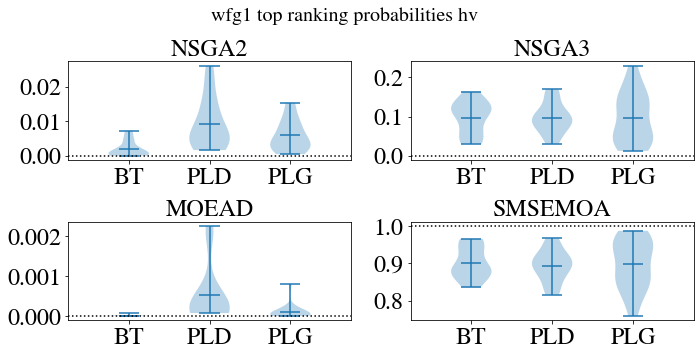

/tmp/ipykernel_4629/3453527545.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/TopOne"+indicator+".tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5.9e-05 seconds
  1000 tra

ok
ok
(20, 4, 4)
(20, 4, 4)


/home/mariano/Documentos/CienciaDeDatos/ServicioSocial/LocalBayesPermus/models/BradleyTerry.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(result)
/tmp/ipykernel_4629/3453527545.py:50: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/BetterThanSynthetic.tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
   

ok


/home/mariano/Documentos/CienciaDeDatos/ServicioSocial/LocalBayesPermus/figure/plot.py:174: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)
/tmp/ipykernel_4629/3453527545.py:72: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/TopKSynthetic.tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the

ok
ok


<Figure size 432x288 with 0 Axes>

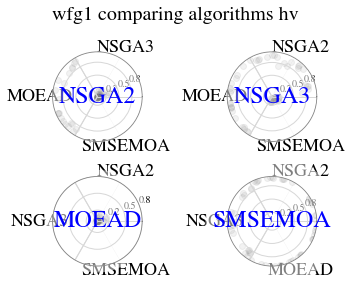

<Figure size 432x288 with 0 Axes>

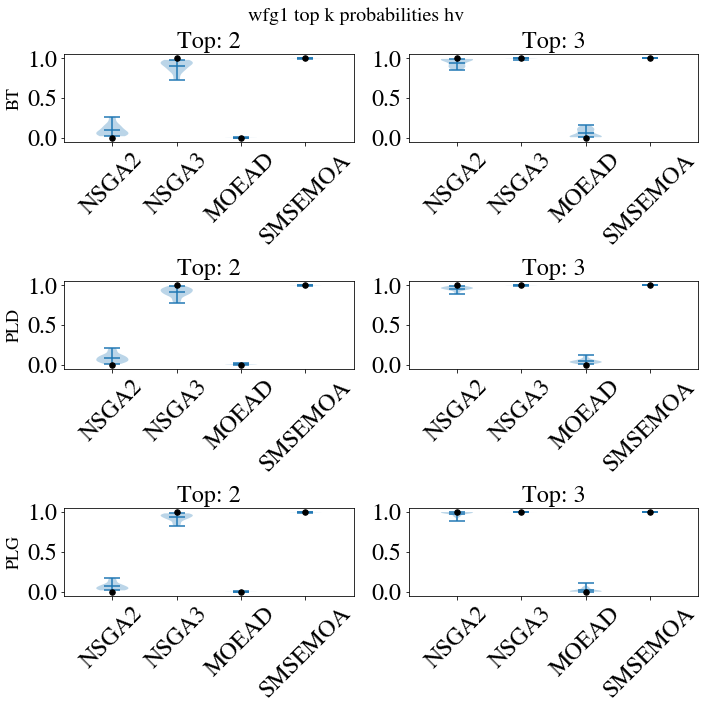

<Figure size 432x288 with 0 Axes>

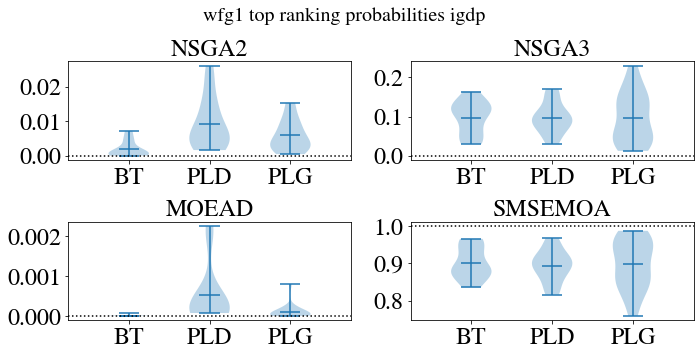

/tmp/ipykernel_4629/3453527545.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/TopOne"+indicator+".tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5.9e-05 seconds
  1000 tra

ok
ok
(20, 4, 4)
(20, 4, 4)


/home/mariano/Documentos/CienciaDeDatos/ServicioSocial/LocalBayesPermus/models/BradleyTerry.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(result)
/tmp/ipykernel_4629/3453527545.py:50: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/BetterThanSynthetic.tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
   

ok


/home/mariano/Documentos/CienciaDeDatos/ServicioSocial/LocalBayesPermus/figure/plot.py:174: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)
/tmp/ipykernel_4629/3453527545.py:72: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/TopKSynthetic.tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the

ok
ok


Sampling: 100% (1020/1020), done.
Messages received during sampling:
  Gradient evaluation took 5.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
  Adjust your expectations accordingly!
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_9d04un8u/model_56wbuo7j.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:   0% (1/1020)
Sampling: 100% (1020/1020)
Sampling: 100% (1020/1020), done.
Messages received during sampling:
  Gradient evaluation took 3.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.37 seconds.
  Adjust your expect

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_ron8diak/model_56wbuo7j.stan', line 35, column 8 to column 40)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_tvufcfjc/model_mjzcacpi.stan', line 4, column 43: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0.

<Figure size 432x288 with 0 Axes>

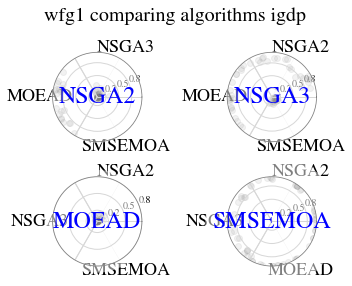

<Figure size 432x288 with 0 Axes>

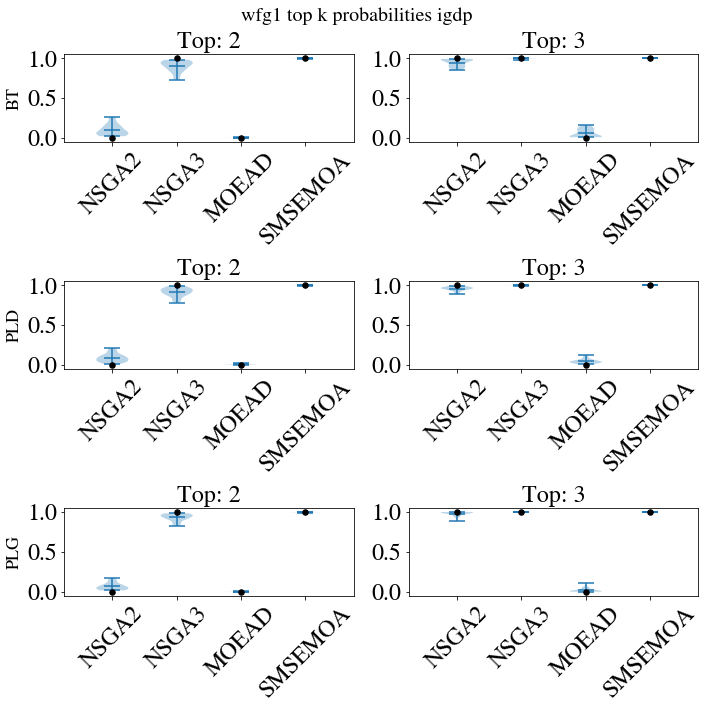

<Figure size 432x288 with 0 Axes>

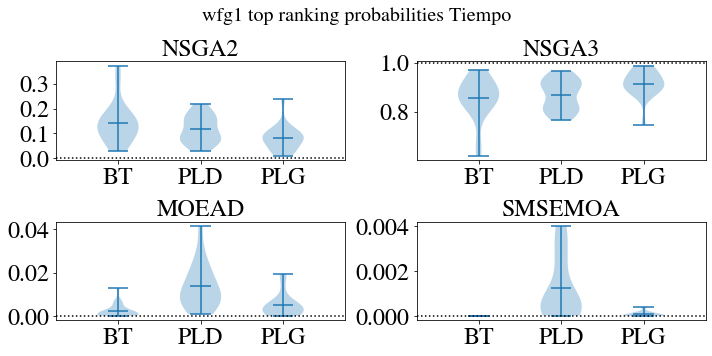

/tmp/ipykernel_4629/3453527545.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/TopOne"+indicator+".tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5.7e-05 seconds
  1000 tra

ok
ok
(20, 4, 4)


Messages received during sampling:
  Gradient evaluation took 3.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.37 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_ron8diak/model_56wbuo7j.stan', line 35, column 8 to column 40)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_ron8diak/model_56wbuo7j.stan', line 35, column 8 to column 40)
  If this war

Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 7.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.71 seconds.
  Adjust your expectations accordingly!
/home/mariano/Documentos/CienciaDeDatos/ServicioSocial/LocalBayesPermus/models/BradleyTerry.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(result)


(20, 4, 4)


/tmp/ipykernel_4629/3453527545.py:50: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/BetterThanSynthetic.tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5.7e-05 seconds
  1000 tra

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_ron8diak/model_56wbuo7j.stan', line 35, column 8 to column 40)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_ron8diak/model_56wbuo7j.stan', line 35, column 8 to column 40)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matric

ok


Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_tvufcfjc/model_mjzcacpi.stan', line 4, column 43: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/tmp/httpstan_tvufcfjc/model_mjzcacpi.stan', line 20, column 6: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_tvufcfjc/model_mjzcacpi.stan', line 21, column 6: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
 

ok
ok


Sampling: 100% (1020/1020), done.
Messages received during sampling:
  Gradient evaluation took 4.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.42 seconds.
  Adjust your expectations accordingly!
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_9d04un8u/model_56wbuo7j.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:  29% (300/1020)
Sampling: 100% (1020/1020)
Sampling: 100% (1020/1020), done.
Messages received during sampling:
  Gradient evaluation took 5.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.
  Adjust your expe

<Figure size 432x288 with 0 Axes>

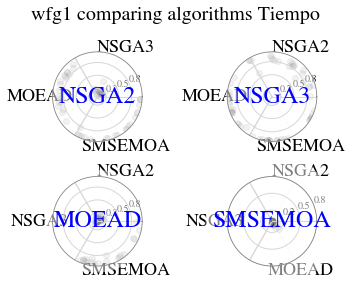

<Figure size 432x288 with 0 Axes>

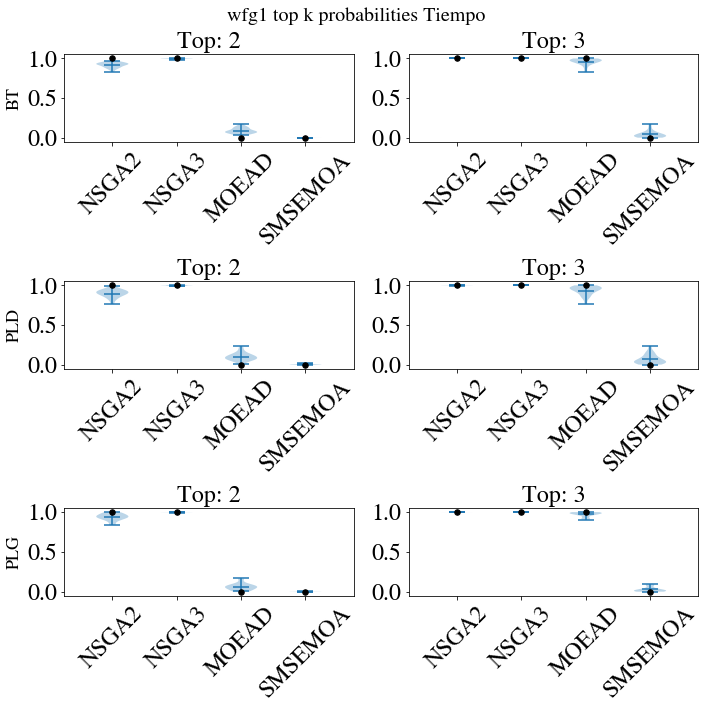

<Figure size 432x288 with 0 Axes>

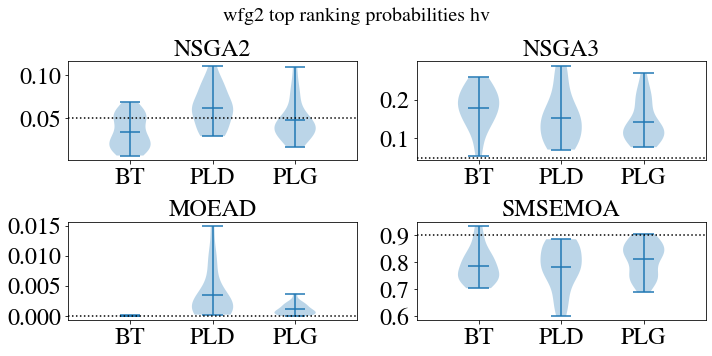

/tmp/ipykernel_4629/3453527545.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/TopOne"+indicator+".tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 4.2e-05 seconds
  1000 tra

ok
ok
(20, 4, 4)
(20, 4, 4)


Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.59 seconds.
  Adjust your expectations accordingly!
/home/mariano/Documentos/CienciaDeDatos/ServicioSocial/LocalBayesPermus/models/BradleyTerry.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(result)
/tmp/ipykernel_4629/3453527545.py:50: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/BetterThanSynthetic.

ok


  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_tvufcfjc/model_mjzcacpi.stan', line 4, column 43: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/tmp/httpstan_tvufcfjc/model_mjzcacpi.stan', line 20, column 6: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_tvufcfjc/model_mjzcacpi.stan', line 21, colu

ok
ok


Sampling: 100% (1020/1020), done.
Messages received during sampling:
  Gradient evaluation took 4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.4 seconds.
  Adjust your expectations accordingly!
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_9d04un8u/model_56wbuo7j.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:  10% (100/1020)
Sampling: 100% (1020/1020)
Sampling: 100% (1020/1020), done.
Messages received during sampling:
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectatio

<Figure size 432x288 with 0 Axes>

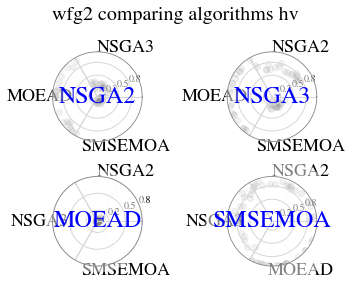

<Figure size 432x288 with 0 Axes>

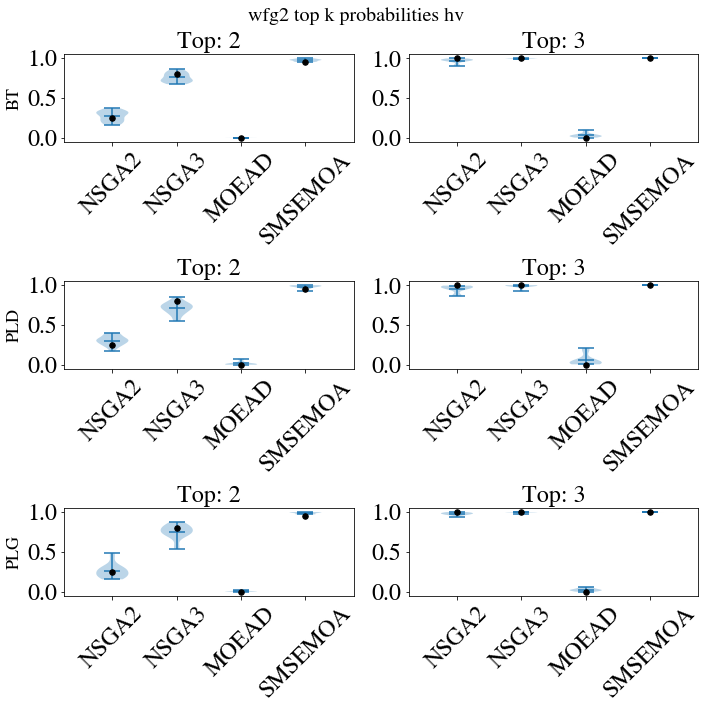

<Figure size 432x288 with 0 Axes>

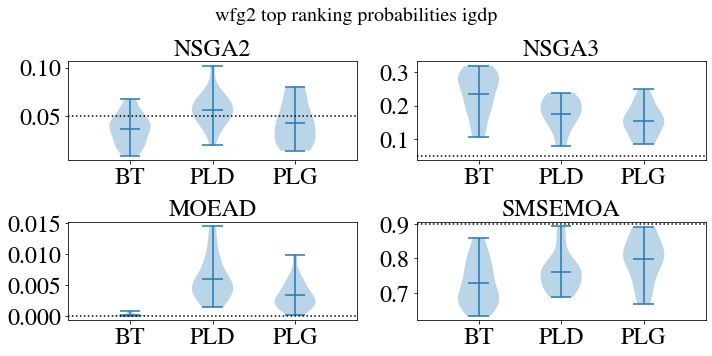

/tmp/ipykernel_4629/3453527545.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/TopOne"+indicator+".tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 4e-05 seconds
  1000 trans

ok
ok
(20, 4, 4)
(20, 4, 4)


/home/mariano/Documentos/CienciaDeDatos/ServicioSocial/LocalBayesPermus/models/BradleyTerry.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(result)
/tmp/ipykernel_4629/3453527545.py:50: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/BetterThanSynthetic.tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
   

ok


/home/mariano/Documentos/CienciaDeDatos/ServicioSocial/LocalBayesPermus/figure/plot.py:174: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)
/tmp/ipykernel_4629/3453527545.py:72: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/TopKSynthetic.tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the

ok
ok


Sampling: 100% (1020/1020), done.
Messages received during sampling:
  Gradient evaluation took 3.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.39 seconds.
  Adjust your expectations accordingly!
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_9d04un8u/model_56wbuo7j.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling: 100% (1020/1020)
Sampling: 100% (1020/1020), done.
Messages received during sampling:
  Gradient evaluation took 1.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
  Adjust your expectations accordingly!
  In

Sampling:   0%
Sampling:  10% (100/1020)
Sampling: 100% (1020/1020)
Sampling: 100% (1020/1020), done.
Messages received during sampling:
  Gradient evaluation took 2.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
  Adjust your expectations accordingly!
/home/mariano/Documentos/CienciaDeDatos/ServicioSocial/LocalBayesPermus/models/BradleyTerry.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(result)


<Figure size 432x288 with 0 Axes>

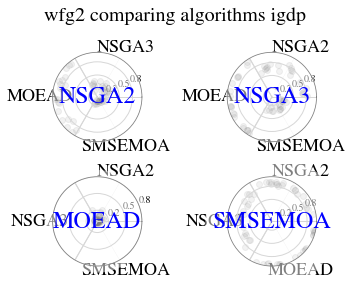

<Figure size 432x288 with 0 Axes>

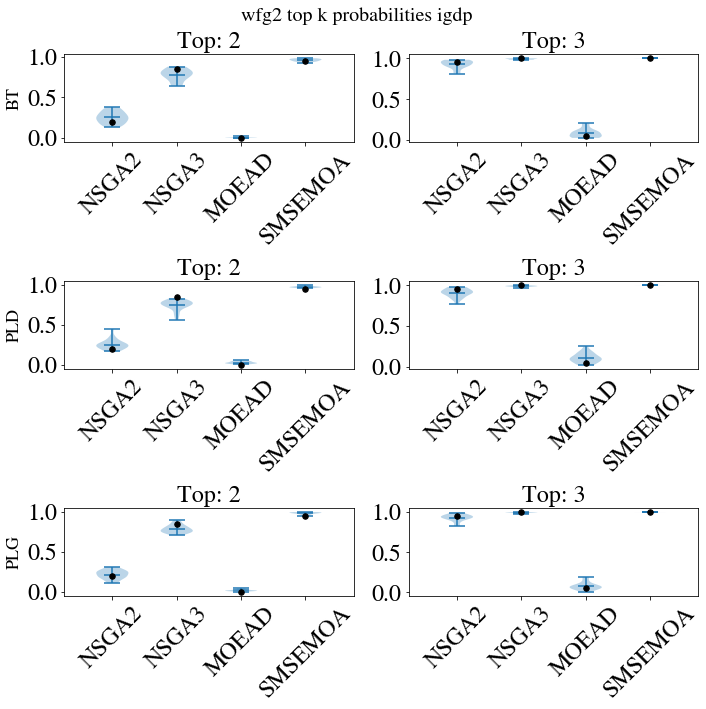

<Figure size 432x288 with 0 Axes>

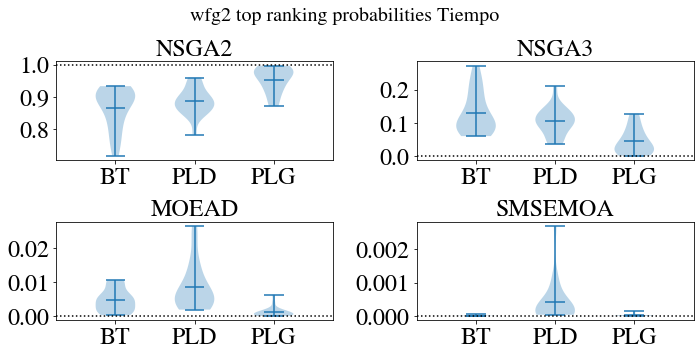

/tmp/ipykernel_4629/3453527545.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/TopOne"+indicator+".tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 3.9e-05 seconds
  1000 tra

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_ron8diak/model_56wbuo7j.stan', line 35, column 8 to column 40)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_tvufcfjc/model_mjzcacpi.stan', line 4, column 43: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/tm

ok
ok
(20, 4, 4)
(20, 4, 4)


Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
  Adjust your expectations accordingly!
/home/mariano/Documentos/CienciaDeDatos/ServicioSocial/LocalBayesPermus/models/BradleyTerry.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(result)
/tmp/ipykernel_4629/3453527545.py:50: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/Bette

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_ron8diak/model_56wbuo7j.stan', line 35, column 8 to column 40)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_ron8diak/model_56wbuo7j.stan', li

ok


Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
  Adjust your expectations accordingly!
/home/mariano/Documentos/CienciaDeDatos/ServicioSocial/LocalBayesPermus/models/BradleyTerry.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(result)
/home/mariano/Documentos/CienciaDeDatos/ServicioSocial/LocalBayesPermus/figure/plot.py:174: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)
/tmp/ipykernel_4629/3453527545.py:72: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for 

ok
ok


Sampling: 100% (1020/1020)
Sampling: 100% (1020/1020), done.
Messages received during sampling:
  Gradient evaluation took 1.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
  Adjust your expectations accordingly!
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_9d04un8u/model_56wbuo7j.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:  10% (100/1020)
Sampling:  39% (400/1020)
Sampling: 100% (1020/1020)
Sampling: 100% (1020/1020), done.
Messages received during sampling:
  Gradient evaluation took 4.1e-05 seconds
  1000 transitions using 10 leapfrog steps per t

<Figure size 432x288 with 0 Axes>

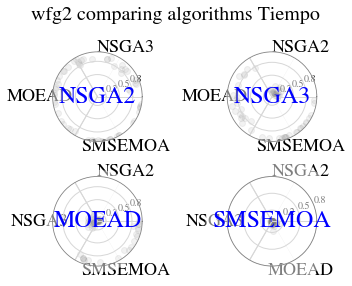

<Figure size 432x288 with 0 Axes>

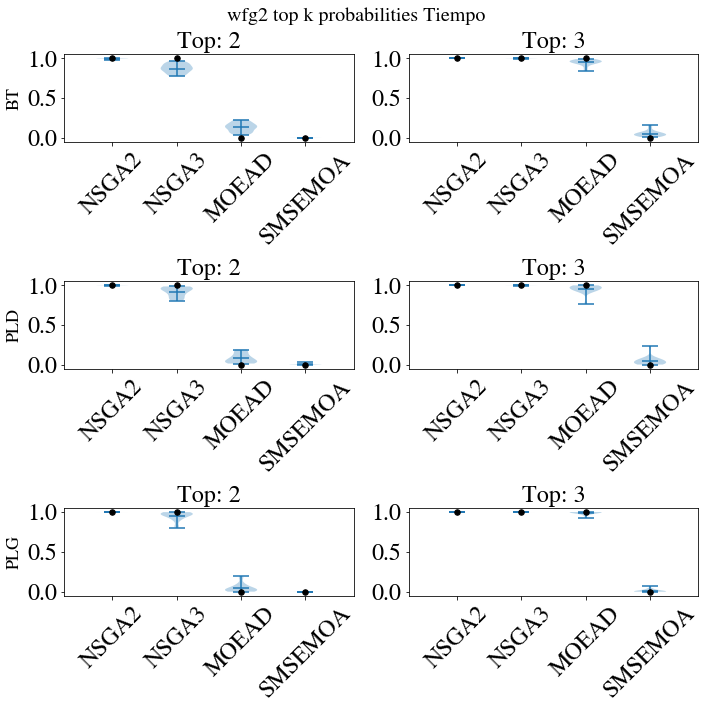

<Figure size 432x288 with 0 Axes>

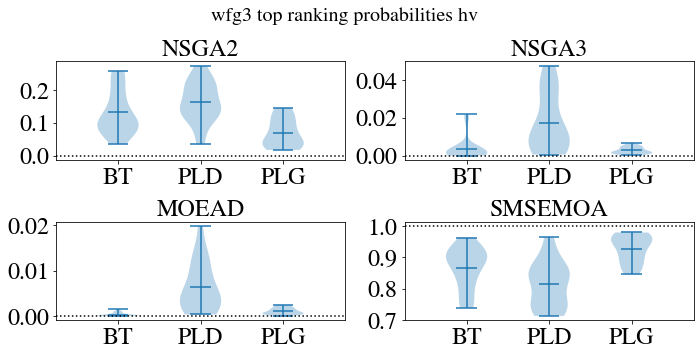

/tmp/ipykernel_4629/3453527545.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/TopOne"+indicator+".tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 1.5e-05 seconds
  1000 tra

ok
ok
(20, 4, 4)
(20, 4, 4)


/home/mariano/Documentos/CienciaDeDatos/ServicioSocial/LocalBayesPermus/models/BradleyTerry.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(result)
/tmp/ipykernel_4629/3453527545.py:50: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/BetterThanSynthetic.tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
   

ok


/home/mariano/Documentos/CienciaDeDatos/ServicioSocial/LocalBayesPermus/figure/plot.py:174: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)
/tmp/ipykernel_4629/3453527545.py:72: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/TopKSynthetic.tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the

ok
ok


Sampling: 100% (1020/1020)
Sampling: 100% (1020/1020), done.
Messages received during sampling:
  Gradient evaluation took 3.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.39 seconds.
  Adjust your expectations accordingly!
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_9d04un8u/model_56wbuo7j.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:  10% (100/1020)
Sampling:  39% (400/1020)
Sampling:  78% (800/1020)
Sampling: 100% (1020/1020)
Sampling: 100% (1020/1020), done.
Messages received during sampling:
  Gradient evaluation took 3e-05 seconds
  1000 transitions using

<Figure size 432x288 with 0 Axes>

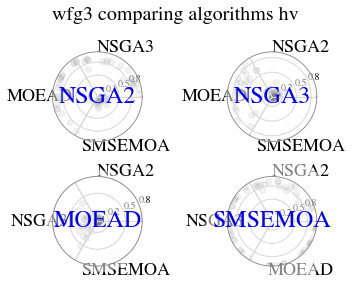

<Figure size 432x288 with 0 Axes>

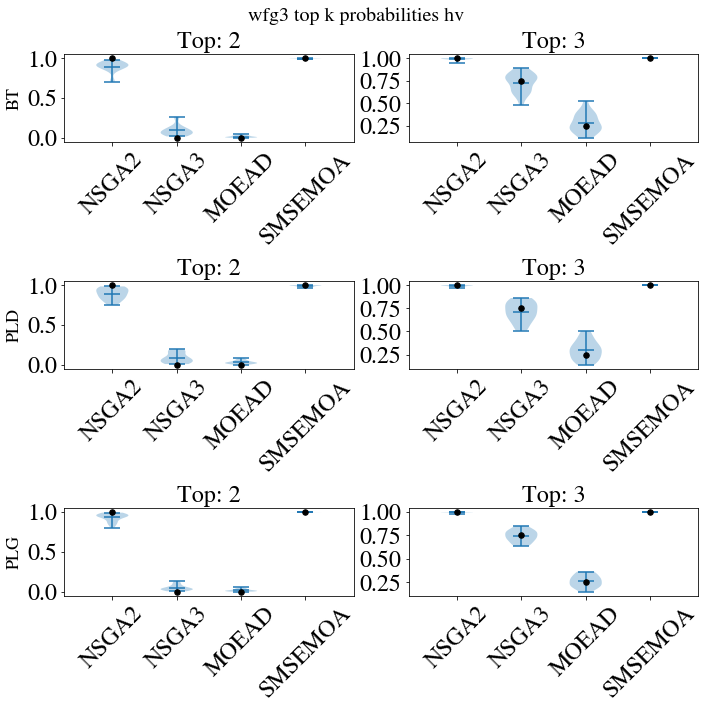

<Figure size 432x288 with 0 Axes>

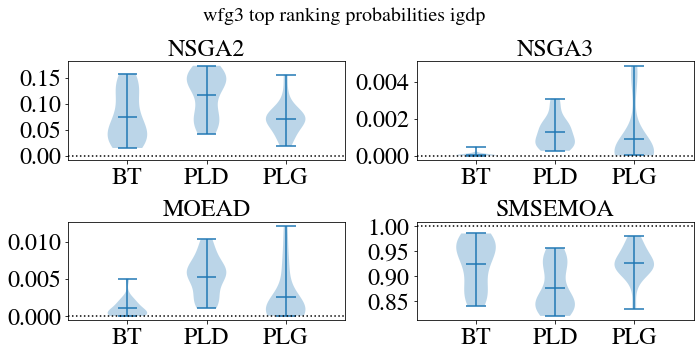

/tmp/ipykernel_4629/3453527545.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/TopOne"+indicator+".tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 3.9e-05 seconds
  1000 tra

ok
ok
(20, 4, 4)
(20, 4, 4)


/home/mariano/Documentos/CienciaDeDatos/ServicioSocial/LocalBayesPermus/models/BradleyTerry.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(result)
/tmp/ipykernel_4629/3453527545.py:50: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/BetterThanSynthetic.tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
   

ok


Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_ron8diak/model_56wbuo7j.stan', line 35, column 8 to column 40)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_ron8diak/model_56wbuo7j.stan', line 35, co

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_ron8diak/model_56wbuo7j.stan', line 35, column 8 to column 40)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_ron8diak/model_56wbuo7j.stan', li

ok
ok


<Figure size 432x288 with 0 Axes>

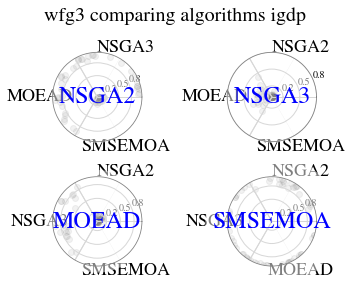

<Figure size 432x288 with 0 Axes>

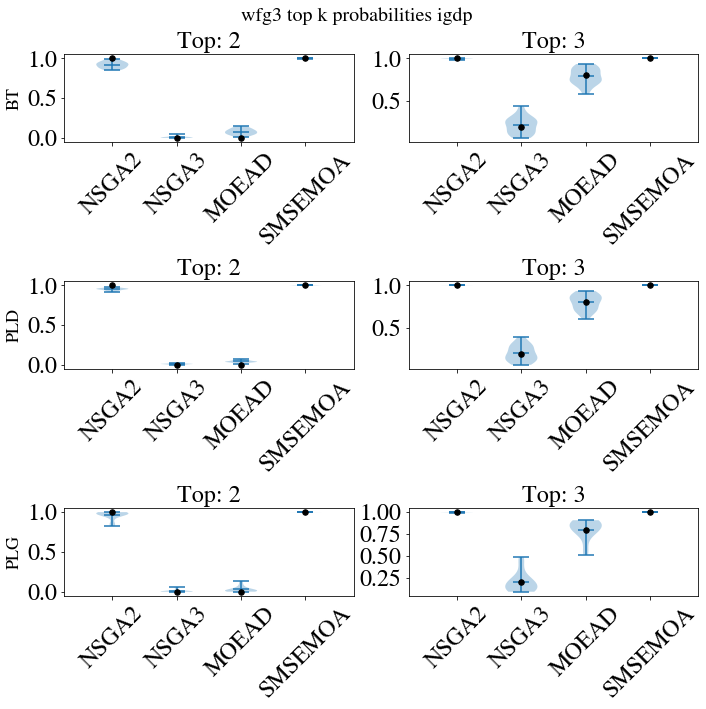

<Figure size 432x288 with 0 Axes>

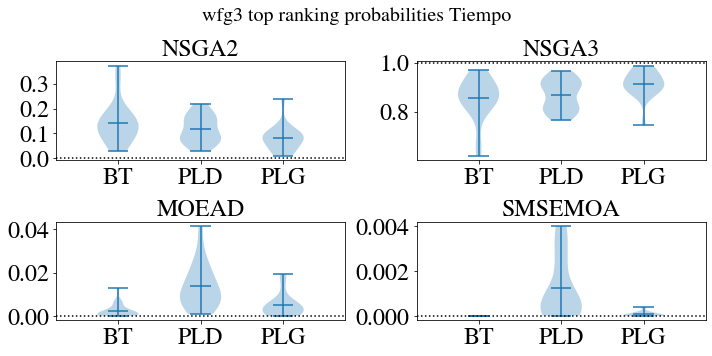

/tmp/ipykernel_4629/3453527545.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/TopOne"+indicator+".tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 5.7e-05 seconds
  1000 tra

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_ron8diak/model_56wbuo7j.stan', line 35, column 8 to column 40)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_ron8diak/model_56wbuo7j.stan', line 35, column 8 to column 40)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matric

ok
ok
(20, 4, 4)
(20, 4, 4)


Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_tvufcfjc/model_mjzcacpi.stan', line 4, column 43: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/tmp/httpstan_tvufcfjc/model_mjzcacpi.stan', line 20, column 6: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_tvufcfjc/model_mjzcacpi.stan', line 21, column 6: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
 

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_ron8diak/model_56wbuo7j.stan', line 35, column 8 to column 40)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_ron8diak/model_56wbuo7j.stan', li

ok


Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_tvufcfjc/model_mjzcacpi.stan', line 4, column 43: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/tmp/httpstan_tvufcfjc/model_mjzcacpi.stan', line 20, column 6: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_tvufcfjc/model_mjzcacpi.stan', line 21, column 6: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
 

ok
ok


Sampling: 100% (1020/1020), done.
Messages received during sampling:
  Gradient evaluation took 1.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
  Adjust your expectations accordingly!
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_9d04un8u/model_56wbuo7j.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:   0% (1/1020)
Sampling:  39% (400/1020)
Sampling:  88% (900/1020)
Sampling: 100% (1020/1020)
Sampling: 100% (1020/1020), done.
Messages received during sampling:
  Gradient evaluation took 2.4e-05 seconds
  1000 transitions using 10 leapfrog steps per tran

<Figure size 432x288 with 0 Axes>

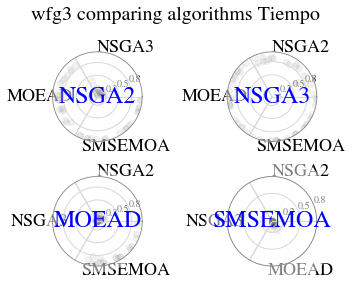

<Figure size 432x288 with 0 Axes>

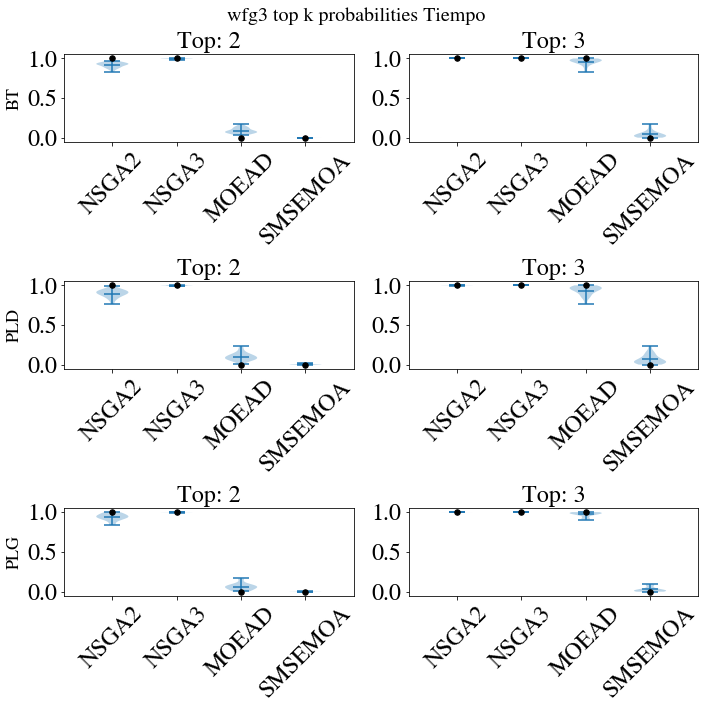

<Figure size 432x288 with 0 Axes>

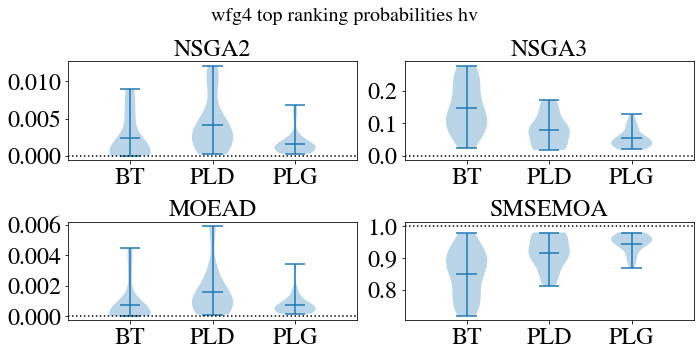

/tmp/ipykernel_4629/3453527545.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/TopOne"+indicator+".tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 1.5e-05 seconds
  1000 tra

ok
ok
(20, 4, 4)
(20, 4, 4)


/home/mariano/Documentos/CienciaDeDatos/ServicioSocial/LocalBayesPermus/models/BradleyTerry.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(result)
/tmp/ipykernel_4629/3453527545.py:50: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/BetterThanSynthetic.tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
   

ok


/home/mariano/Documentos/CienciaDeDatos/ServicioSocial/LocalBayesPermus/figure/plot.py:174: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)
/tmp/ipykernel_4629/3453527545.py:72: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/TopKSynthetic.tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the

ok
ok


Sampling: 100% (1020/1020)
Sampling: 100% (1020/1020), done.
Messages received during sampling:
  Gradient evaluation took 3.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.39 seconds.
  Adjust your expectations accordingly!
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_9d04un8u/model_56wbuo7j.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:   0% (1/1020)
Sampling:  39% (400/1020)
Sampling:  78% (800/1020)
Sampling: 100% (1020/1020)
Sampling: 100% (1020/1020), done.
Messages received during sampling:
  Gradient evaluation took 3.9e-05 seconds
  1000 transitions using

<Figure size 432x288 with 0 Axes>

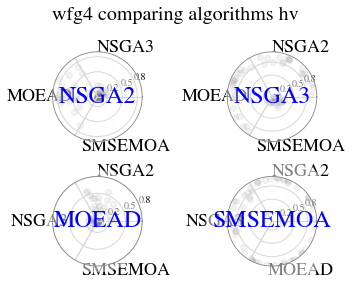

<Figure size 432x288 with 0 Axes>

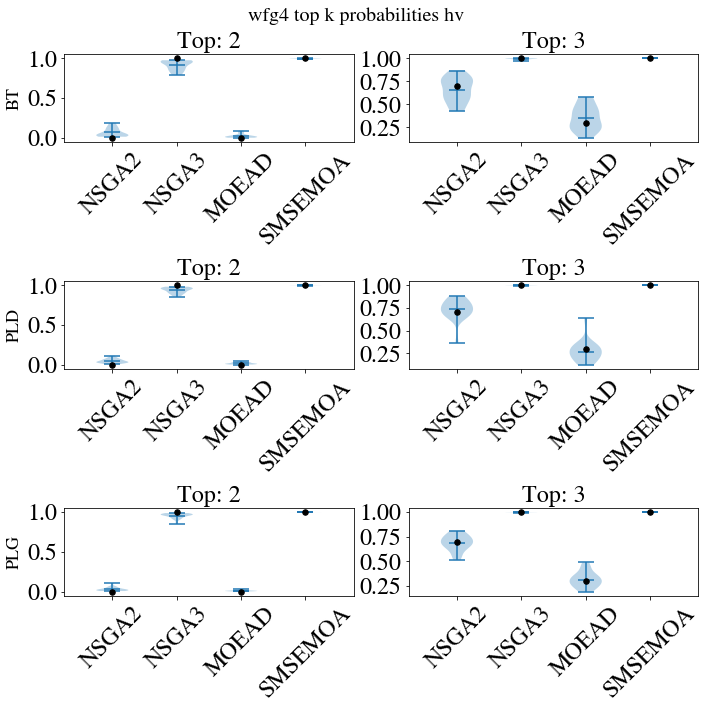

<Figure size 432x288 with 0 Axes>

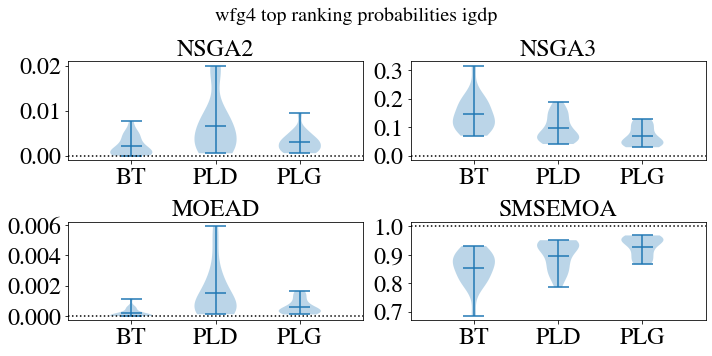

/tmp/ipykernel_4629/3453527545.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/TopOne"+indicator+".tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 3.9e-05 seconds
  1000 tra

ok
ok
(20, 4, 4)
(20, 4, 4)


/home/mariano/Documentos/CienciaDeDatos/ServicioSocial/LocalBayesPermus/models/BradleyTerry.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(result)
/tmp/ipykernel_4629/3453527545.py:50: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/BetterThanSynthetic.tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
   

ok


/home/mariano/Documentos/CienciaDeDatos/ServicioSocial/LocalBayesPermus/figure/plot.py:174: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)
/tmp/ipykernel_4629/3453527545.py:72: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/TopKSynthetic.tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the

  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_ron8diak/model_56wbuo7j.stan', line 35, column 8 to column 40)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_tvufcfjc/model_mjzcacpi.stan', line 4, column 43: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0.

ok
ok


<Figure size 432x288 with 0 Axes>

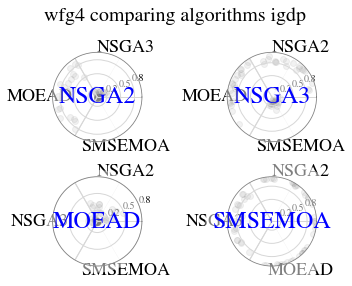

<Figure size 432x288 with 0 Axes>

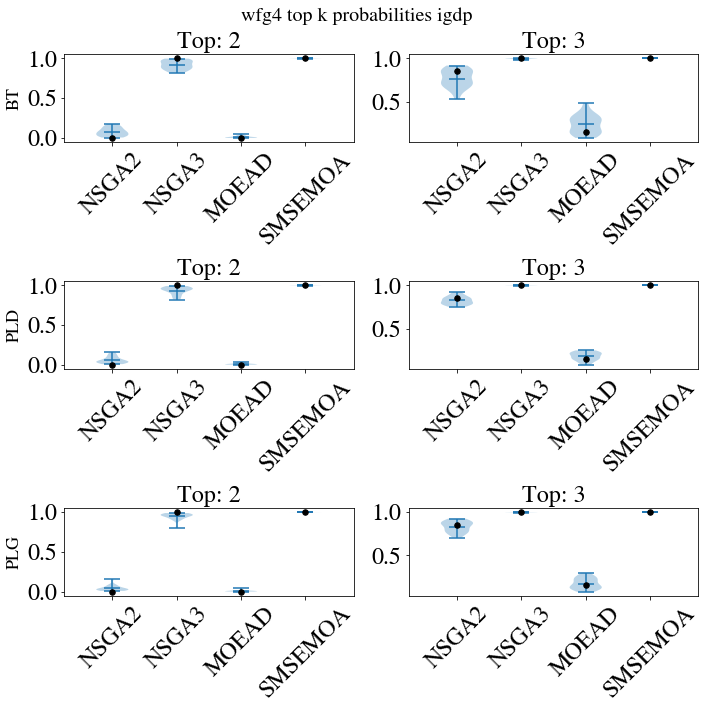

<Figure size 432x288 with 0 Axes>

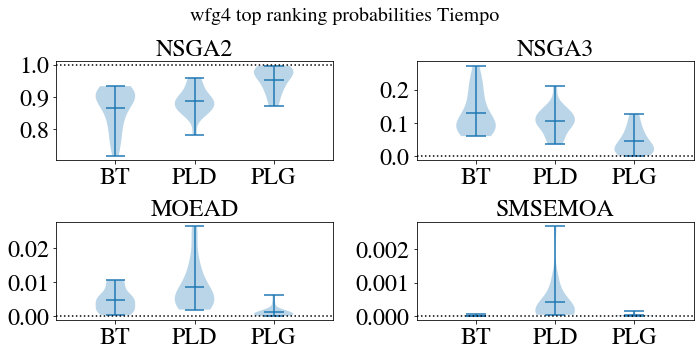

/tmp/ipykernel_4629/3453527545.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/TopOne"+indicator+".tex")
Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_jr2ulc64/model_dzy5yznz.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 3.9e-05 seconds
  1000 tra

  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_ron8diak/model_56wbuo7j.stan', line 35, column 8 to column 40)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


ok
ok
(20, 4, 4)
(20, 4, 4)


Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_tvufcfjc/model_mjzcacpi.stan', line 4, column 43: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/tmp/httpstan_tvufcfjc/model_mjzcacpi.stan', line 20, column 6: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_tvufcfjc/model_mjzcacpi.stan', line 21, column 6: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
 

ok


Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 1.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_ron8diak/model_56wbuo7j.stan', line 35, column 8 to column 40)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/httpstan_ron8diak/model_56wbuo7j.stan', line 35,

Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
  Adjust your expectations accordingly!
/home/mariano/Documentos/CienciaDeDatos/ServicioSocial/LocalBayesPermus/models/BradleyTerry.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(result)
/home/mariano/Documentos/CienciaDeDatos/ServicioSocial/LocalBayesPermus/figure/plot.py:174: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)


ok


/tmp/ipykernel_4629/3453527545.py:72: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("tables/TopKSynthetic.tex")


<Figure size 432x288 with 0 Axes>

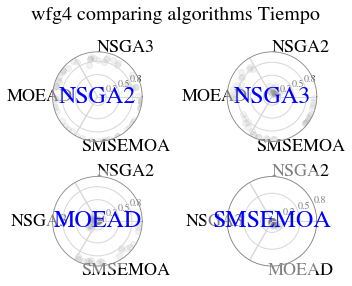

<Figure size 432x288 with 0 Axes>

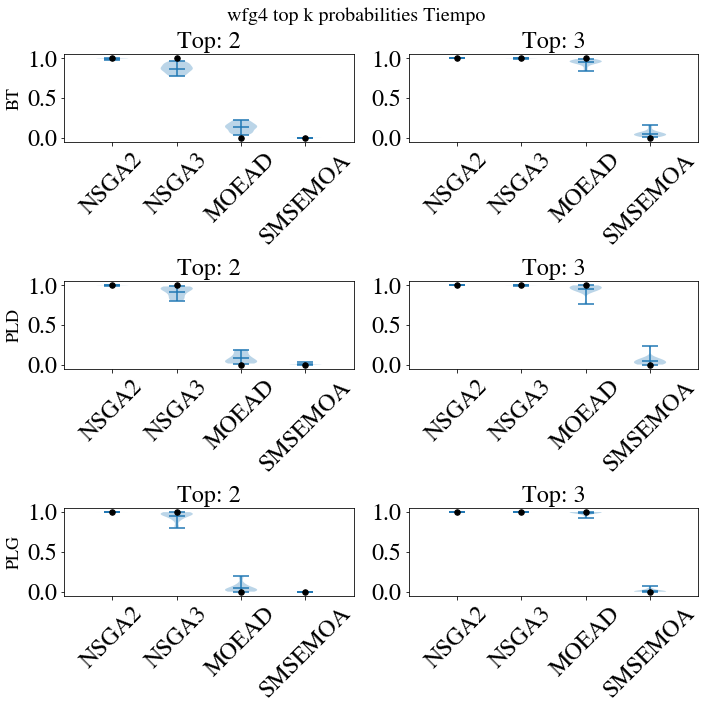

In [21]:
primer_lugar=[]
for problema in problemas:
    for indicador in indicadores:
        arreglo=[]
        for algoritmo in algoritmos:
            arreglo.append(finales[(finales['Problema']==problema)&(finales['Algoritmo']==algoritmo)][indicador])
        arreglo=np.array(arreglo).T
        if indicador=='hv':
            arreglo=arreglo*-1
        primer_lugar.append(resultados(arreglo,modelos,algoritmos,indicador,problema,dim))

In [22]:
primer_lugar

[                   NSGA2                NSGA3                MOEAD  \
 BT   1.99E-03 (2.28E-03)  9.67E-02 (4.15E-02)  5.72E-06 (1.61E-05)   
 PLD  9.28E-03 (7.11E-03)  9.69E-02 (3.86E-02)  5.27E-04 (7.03E-04)   
 PLG  5.90E-03 (4.39E-03)  9.66E-02 (6.28E-02)  1.05E-04 (1.75E-04)   
 
                  SMSEMOA  
 BT   9.01E-01 (4.18E-02)  
 PLD  8.93E-01 (4.15E-02)  
 PLG  8.97E-01 (6.48E-02)  ,
                    NSGA2                NSGA3                MOEAD  \
 BT   1.99E-03 (2.28E-03)  9.67E-02 (4.15E-02)  5.72E-06 (1.61E-05)   
 PLD  9.28E-03 (7.11E-03)  9.69E-02 (3.86E-02)  5.27E-04 (7.03E-04)   
 PLG  5.90E-03 (4.39E-03)  9.66E-02 (6.28E-02)  1.05E-04 (1.75E-04)   
 
                  SMSEMOA  
 BT   9.01E-01 (4.18E-02)  
 PLD  8.93E-01 (4.15E-02)  
 PLG  8.97E-01 (6.48E-02)  ,
                    NSGA2                NSGA3                MOEAD  \
 BT   1.41E-01 (8.12E-02)  8.56E-01 (8.35E-02)  2.54E-03 (3.09E-03)   
 PLD  1.17E-01 (5.38E-02)  8.68E-01 (6.11E-02)  1.37E-02 (9.

In [23]:
for problema_indicador in primer_lugar:
    for column in problema_indicador.columns:
        problema_indicador[column]=problema_indicador[column].str.extract('(^[\d.E-]+)')
        problema_indicador[column]=pd.to_numeric(problema_indicador[column])
    #problema_indicador=problema_indicador.T

In [24]:
for problema_indicador in primer_lugar:
    problema_indicador=problema_indicador.T

In [25]:
primeros_lugares={'NSGA2':0,'NSGA3':0,'MOEAD':0,'SMSEMOA':0}
for problema_indicador in primer_lugar:
    for ganador in problema_indicador.T.idxmax():
        primeros_lugares[ganador]+=1

In [26]:
#repetir para número de objetivos distintos
primeros_lugares

{'NSGA2': 6, 'NSGA3': 6, 'MOEAD': 0, 'SMSEMOA': 24}

In [27]:
#tabla de contenido tentativa de reporte final